## torch.optim
torch.optim 模块是 PyTorch 中用于实现各种优化算法的库。这些优化算法的目标是最小化模型的损失函数。在深度学习中，这意味着根据损失函数的梯度来调整模型参数（权重和偏置），使模型在训练数据上的表现越来越好。</br>
SGD (Stochastic Gradient Descent): 最基础的梯度下降法，可以带动量（momentum）。</br>
Adam (Adaptive Moment Estimation): 一种自适应学习率的优化算法，结合了 AdaGrad 和 RMSProp 的优点，通常是首选。</br>
AdamW (Adam with Weight Decay Fix): Adam 的变种，更正了 Adam 中权重衰减的实现，在许多任务中表现更好。</br>
RMSprop (Root Mean Square Propagation): 另一种自适应学习率算法，通过除以梯度的平方的移动平均来调整学习率。</br>
Adagrad (Adaptive Gradient Algorithm): 为每个参数维护一个学习率，并根据该参数梯度的历史平方和来调整学习率。</br>
**运行原理**</br>
所有 torch.optim 中的优化器都是继承自抽象基类 torch.optim.Optimizer。它们的核心运行原理可以概括为以下几点：</br>
1. 管理模型参数</br>
优化器在初始化时，需要知道它要优化哪些模型参数。这些参数通常是 torch.nn.Module 的 parameters() 方法返回的迭代器。优化器会维护一个对这些参数的引用，并在训练过程中更新它们。</br>
2. 梯度获取</br>
优化器本身不计算梯度。梯度是在调用 loss.backward() 后，由 PyTorch 的自动微分（autograd）引擎计算并存储在每个参数的 .grad 属性中的。优化器的任务是读取这些梯度。</br>
3. 参数更新规则</br>
每个优化器都实现了一个特定的算法，用于根据当前参数的梯度来计算参数的更新量。例如，SGD 的更新规则是：param = param - learning_rate * param.grad。Adam 等更复杂的优化器则会引入动量、自适应学习率等概念。</br>
4. 状态管理</br>
一些优化器（如 Adam、RMSprop）需要维护额外的“状态”变量，例如梯度的移动平均值（一阶矩和二阶矩）。这些状态会随着训练的进行而更新，并影响后续的参数更新。


In [ ]:
# 其实只要知道
'''
1. 有多种optimizer，不同的optimizer实现的优化算法有所不同，通常使用Adam即可
2. 在使用时主要需要传入如下参数：
optim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)
3. 注意pytorch的梯度是累计的，所以一般情况下，每一次使用optim之前都需要清空梯度
optimizer.zero_grad()
4. 在每次前向传播和计算了loss之后，还需要带上loss进行反向传播以更新梯度
loss = loss_ftn(model(inputs), Y)
loss.backward()
5. 更新梯度之后由.step()更新模型参数
optimizer.step()

'''

'\n1. 有多种optimizer，不同的optimizer实现的优化算法有所不同，通常使用Adam即可\n2. 在使用时主要需要传入如下参数：\noptim.Adam(model.parameters(), lr = lr, weight_decay = weight_decay)\n3. 注意pytorch的梯度是累计的，所以一般情况下，每一次使用optim之前都需要清空梯度\noptimizer.zero_grad()\n4. 在每次前向传播和计算了loss之后，还需要带上loss进行反向传播以更新梯度\nloss = loss_ftn(model(inputs), targets)\nloss.backward()\n5. 更新梯度之后由.step()更新模型参数\noptimizer.step()\n\n'

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

# --- 1. 定义一个简单的Dataset ---
class SimpleLinearDataset(Dataset):
    def __init__(self, num_samples=1000):
        self.num_samples = num_samples
        # 生成 x 值，形状为 [num_samples, 1]
        self.X = torch.randn(num_samples, 1) * 10
        # 生成 y 值，基于线性关系 y = 2*x + 1，并添加噪声
        self.y = 2 * self.X + 1 + torch.randn(num_samples, 1) * 2

    def __len__(self):
        """返回数据集的样本总数"""
        return self.num_samples

    def __getitem__(self, idx):
        """
        根据索引返回单个样本。
        DataLoader会多次调用这个方法来获取一个批次的数据。
        """
        return self.X[idx], self.y[idx]

In [ ]:
# --- 2. 定义一个简单的模型 (线性回归) ---
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # 输入特征是1维，输出也是1维
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
# --- 3. 设置训练参数 ---
num_samples = 1000
batch_size = 64
num_epochs = 20
learning_rate = 0.01

# 检查是否有GPU可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# --- 4. 实例化Dataset和DataLoader ---
dataset = SimpleLinearDataset(num_samples=num_samples)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)

# --- 5. 实例化模型、损失函数和优化器 ---
model = LinearRegressionModel().to(device)
criterion = nn.MSELoss()

# 实例化优化器
# 传入 model.parameters() 告诉优化器要调整哪些参数
# lr=learning_rate 指定学习率
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

print("\nStarting training...")
loss_history = [] # 记录损失变化


Starting training...


Epoch [1/20], Average Loss: 169.2740
Epoch [2/20], Average Loss: 86.9010
Epoch [3/20], Average Loss: 5.1205
Epoch [4/20], Average Loss: 28.6736
Epoch [5/20], Average Loss: 4.9111
Epoch [6/20], Average Loss: 6.1264
Epoch [7/20], Average Loss: 4.9595
Epoch [8/20], Average Loss: 10.4025
Epoch [9/20], Average Loss: 62.1229
Epoch [10/20], Average Loss: 13.5611
Epoch [11/20], Average Loss: 4.7398
Epoch [12/20], Average Loss: 6.1957
Epoch [13/20], Average Loss: 4.0594
Epoch [14/20], Average Loss: 4.7288
Epoch [15/20], Average Loss: 5.1927
Epoch [16/20], Average Loss: 6.9133
Epoch [17/20], Average Loss: 6.9259
Epoch [18/20], Average Loss: 7.3469
Epoch [19/20], Average Loss: 4.9444
Epoch [20/20], Average Loss: 31.5781
Training finished.


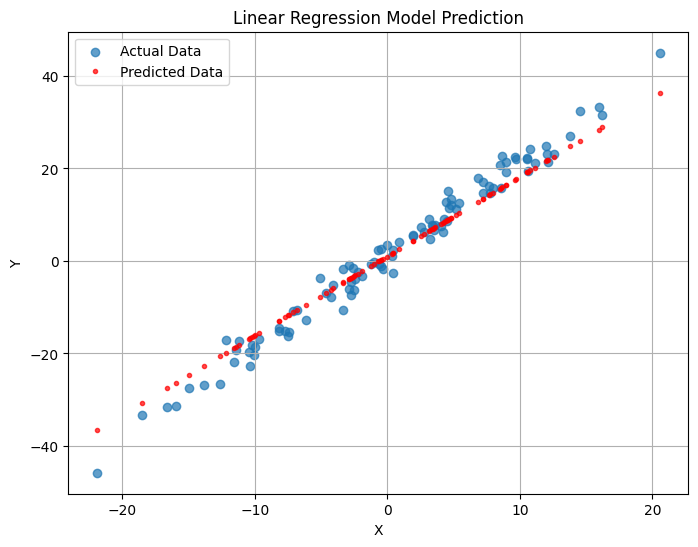


Final Model Parameters:
linear.weight: 1.7163
linear.bias: 1.0522


In [ ]:
# --- 6. 训练循环 ---
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)

        # 优化器操作 1：清零梯度
        optimizer.zero_grad()

        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # 优化器操作 2：反向传播计算梯度
        # loss.backward() 会计算每个参数的梯度并存储在 .grad 属性中
        loss.backward()

        # 优化器操作 3：更新模型参数
        # optimizer.step() 会根据计算出的梯度和优化算法来调整参数值
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_epoch_loss:.4f}")

print("Training finished.")

# --- 7. (可选) 评估模型和可视化 ---
model.eval() # 将模型设置为评估模式
with torch.no_grad(): # 在评估时不计算梯度，节省内存和时间
    # 随机取一些样本进行预测可视化
    sample_indices = random.sample(range(num_samples), 100) # 随机选择100个样本
    sample_X = dataset.X[sample_indices].to(device)
    sample_y = dataset.y[sample_indices].to(device)
    predicted_y = model(sample_X)

    # 将数据移回CPU进行绘图
    sample_X_cpu = sample_X.cpu().numpy()
    sample_y_cpu = sample_y.cpu().numpy()
    predicted_y_cpu = predicted_y.cpu().numpy()

    plt.figure(figsize=(8, 6))
    plt.scatter(sample_X_cpu, sample_y_cpu, label='Actual Data', alpha=0.7)
    plt.plot(sample_X_cpu, predicted_y_cpu, 'r.', label='Predicted Data', alpha=0.7)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression Model Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 打印最终模型的参数
    print("\nFinal Model Parameters:")
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.data.item():.4f}")